<a href="https://colab.research.google.com/github/breshmashri/Project-119-Decision-Tree/blob/main/Project_119_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd

#Column Name
col_names = ['passenger_id', 'p_class', 'sex', 'age', 'sib_sp', 'parch', 'survived']

df = pd.read_csv("titanic.csv", names = col_names).iloc[1:]

print(df.head())

  passenger_id p_class sex   age sib_sp parch survived
1            1       3   1  34.5      1     0        0
2            2       1   0    47      1     0        1
3            3       3   0    62      0     0        1
4            4       1   0    27      1     0        1
5            5       3   1    22      0     0        0


In [6]:
features = ['passenger_id', 'p_class', 'sex', 'age', 'sib_sp', 'parch']
X = df[features]
y = df.survived

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Splitting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#Initialising the Decision Tree Model
clf = DecisionTreeClassifier(max_depth = 3)

#Fitting the data into the model
clf = clf.fit(X_train, y_train)

#Calculating the accuracy of the model
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.746268656716418


In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<p_class &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.038<br/>samples = 102<br/>value = [2, 100]<br/>class = 1>, fillcolor="#3d9fe6"] ;
2 -> 4 ;
5 [label=<sib_sp &le; 2.5<br/>gini = 0.5<br/>samples = 100<br/>value = [51, 49]<br/>class = 0>, fillcolor="#fefaf7"] ;
1 -> 5 ;
6 [label=<gini = 0.496<br/>samples = 88<br/>value = [40, 48]<br/>class = 1>, fillcolor="#deeffb"] ;


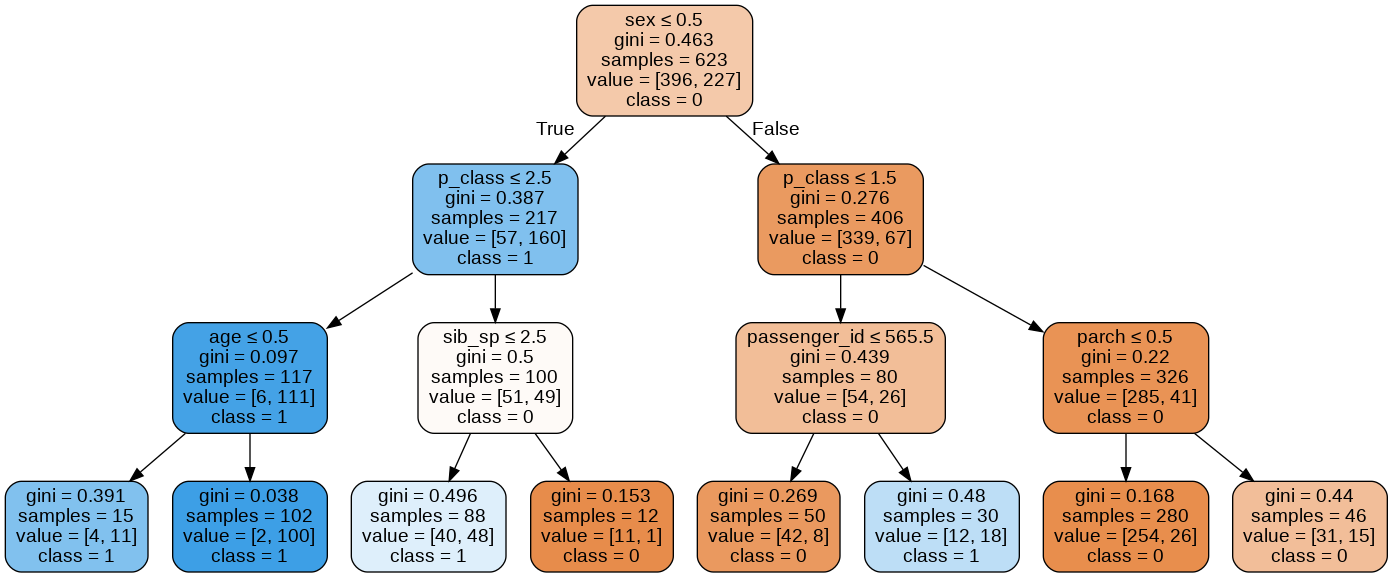

In [15]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())